# AIML MODULE PROJECT - Meghna

## Featurisation & Model Tuning

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import and understand the data.

In [2]:
# A. Import 'signal-data.csv' as DataFrame

data = pd.read_csv('/Users/meghnarana/Downloads/signal-data.csv')

data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [3]:
data.drop(columns=['Time'], inplace=True)

In [4]:
# B. Print 5 point summary and share at least 2 observations
summary = data.describe()

# Display 5 point summary
print(summary)

# Share at least 2 observations
observation1 = "The minimum, maximum, and mean values of Feature 5 are all the same (100.0), and the standard deviation is 0.0. This suggests that Feature 5 does not provide any variability in the data and may not contribute much to the predictive power of the model. Consider dropping this feature during feature selection."
observation2 = "The minimum value of Feature 586 is -0.0169. Since this feature represents a physical measurement, negative values might indicate an issue with data collection or processing. Investigate the nature of Feature 586, and if negative values are not meaningful, consider treating them as missing values or applying an appropriate transformation."

print("\nObservations:")
print(f"1. {observation1}")
print(f"2. {observation2}")

                 0            1            2            3            4   
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000  \
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...   
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...  \
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.0000

### Data cleansing.

In [5]:
# A. Remove features with 20%+ Null values and impute the rest with the mean
threshold_null = 0.2

for column in data.columns:
    null_percentage = data[column].isnull().mean()
    
    if null_percentage >= threshold_null:
        data.drop(column, axis=1, inplace=True)
    elif data[column].dtype != 'object':
        data[column].fillna(data[column].mean(), inplace=True)

In [6]:
# B. Identify and drop features with the same value for all rows
for column in data.columns:
    if data[column].nunique() == 1:
        data.drop(column, axis=1, inplace=True)

In [7]:
# C. Drop other features based on functional knowledge

# Identify and drop features with zero standard deviation
numeric_columns = data.select_dtypes(include=np.number).columns
zero_std_features = data[numeric_columns].columns[data[numeric_columns].std() == 0]
data.drop(zero_std_features, axis=1, inplace=True)

# Drop highly correlated features
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data.drop(to_drop, axis=1, inplace=True)

print('''Justification:
1. Features with zero standard deviation have constant values, meaning they do not provide any discriminatory information. Therefore, dropping them helps in reducing redundancy in the dataset.
2. Highly correlated features may provide redundant information, and their presence can lead to multicollinearity issues in certain modeling techniques (e.g., linear models). Removing one of the highly correlated features helps in simplifying the model, reducing noise, and improving interpretability.
3. The threshold of 0.8 is chosen somewhat arbitrarily but is commonly used. It means that features with a correlation coefficient greater than 0.8 (or less than -0.8) will be considered highly correlated, and one of them will be dropped.''')

Justification:
1. Features with zero standard deviation have constant values, meaning they do not provide any discriminatory information. Therefore, dropping them helps in reducing redundancy in the dataset.
2. Highly correlated features may provide redundant information, and their presence can lead to multicollinearity issues in certain modeling techniques (e.g., linear models). Removing one of the highly correlated features helps in simplifying the model, reducing noise, and improving interpretability.
3. The threshold of 0.8 is chosen somewhat arbitrarily but is commonly used. It means that features with a correlation coefficient greater than 0.8 (or less than -0.8) will be considered highly correlated, and one of them will be dropped.


In [8]:
# D. Check for multi-collinearity using correlation matrix
numeric_data = data.select_dtypes(include=np.number)  # Select only numeric columns
correlation_matrix = numeric_data.corr().abs()

# Create a mask for values above a certain threshold (e.g., 0.8)
mask = (correlation_matrix > 0.8) & (correlation_matrix < 1.0)

# Identify columns to drop based on the mask
to_drop = [column for column in mask.columns if any(mask[column])]

# Drop the identified columns
data.drop(to_drop, axis=1, inplace=True)

In [9]:
data

,0,1,2,3,4,6,7,8,9,10,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,...,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,...,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,...,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,...,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,...,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,...,536.3418,2.0153,7.98,0.2363,0.4988,0.0143,0.006800,0.013800,203.172000,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.433300,-0.006100,-0.009300,...,537.9264,2.1814,5.48,0.3891,0.4975,0.0131,0.006800,0.013800,203.172000,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.462862,-0.000841,0.000146,...,530.3709,2.3435,6.49,0.4154,0.4987,0.0153,0.019700,0.008600,43.523100,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.462200,-0.007200,0.003200,...,534.3936,1.9098,9.13,0.3669,0.5004,0.0178,0.026200,0.024500,93.494100,-1


### Data analysis & visualisation.

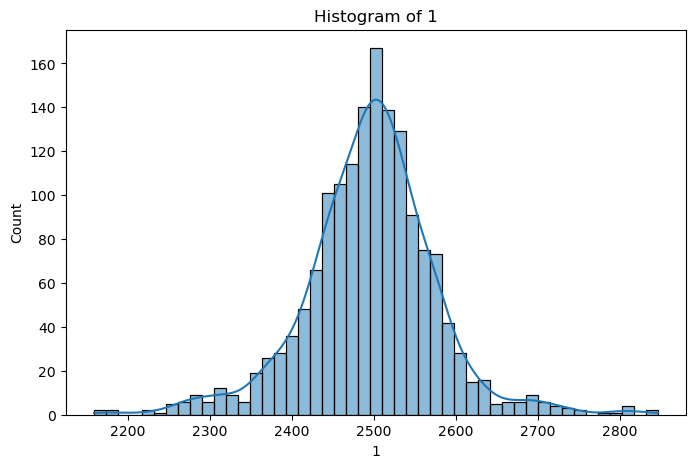

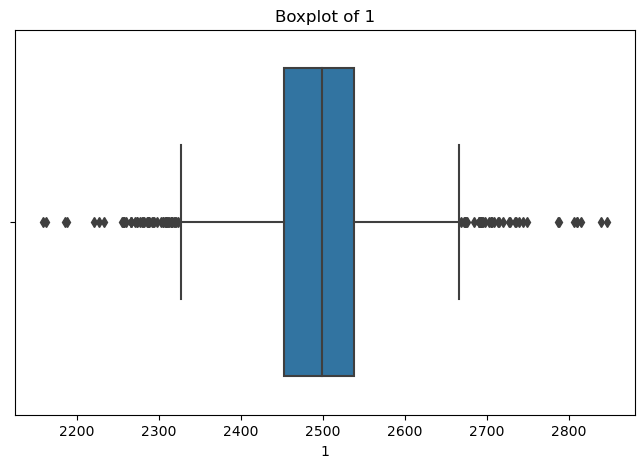

Summary Statistics for 1:
count    1567.000000
mean     2495.850231
std        80.227793
min      2158.750000
25%      2452.885000
50%      2498.910000
75%      2538.745000
max      2846.440000
Name: 1, dtype: float64




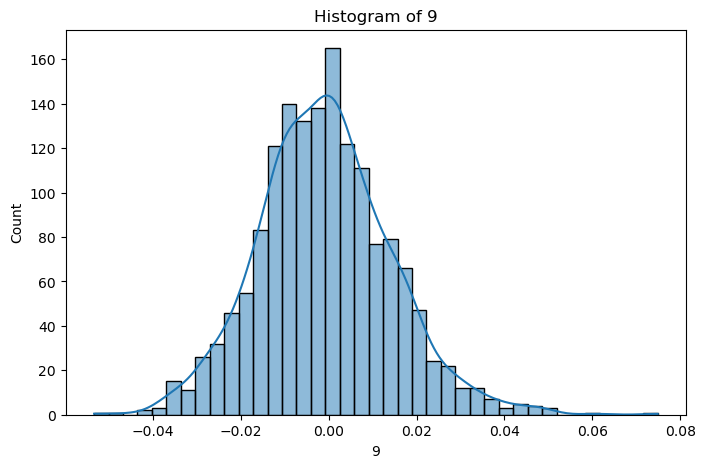

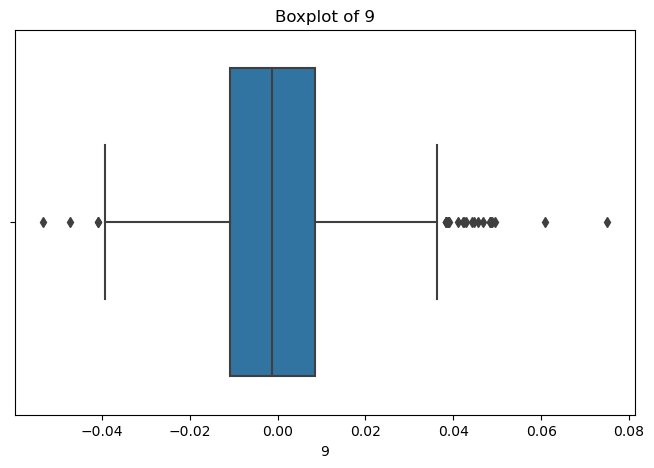

Summary Statistics for 9:
count    1567.000000
mean       -0.000841
std         0.015107
min        -0.053400
25%        -0.010800
50%        -0.001300
75%         0.008400
max         0.074900
Name: 9, dtype: float64




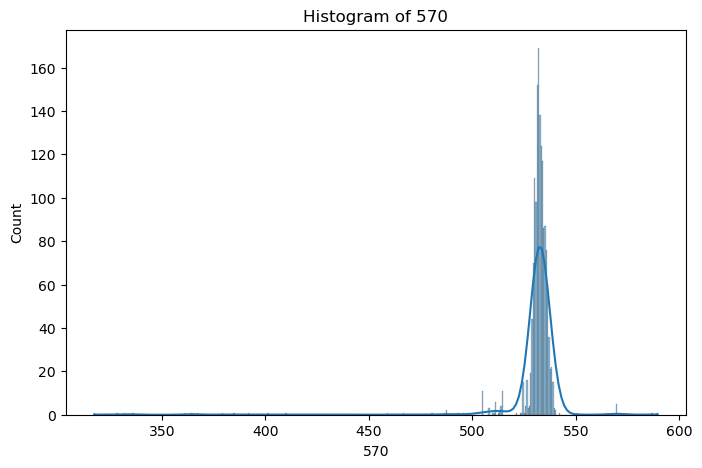

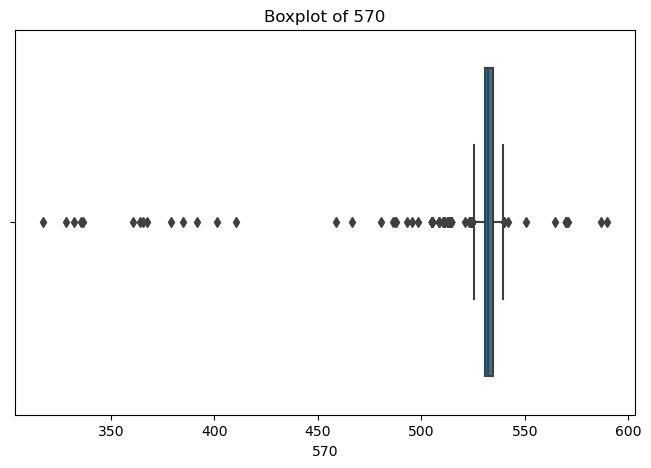

Summary Statistics for 570:
count    1567.000000
mean      530.523623
std        17.499736
min       317.196400
25%       530.702700
50%       532.398200
75%       534.356400
max       589.508200
Name: 570, dtype: float64




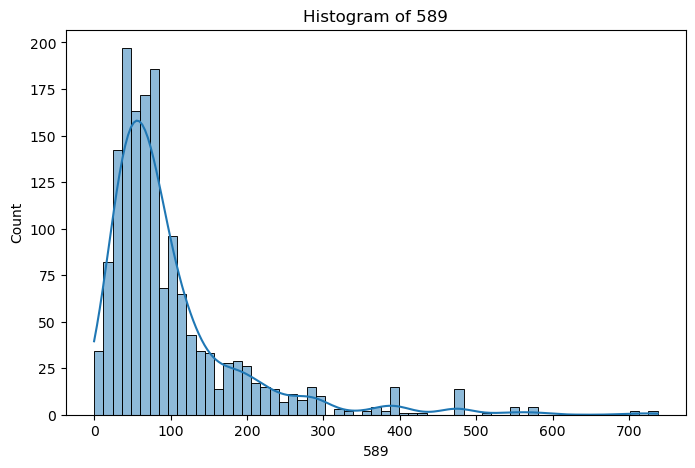

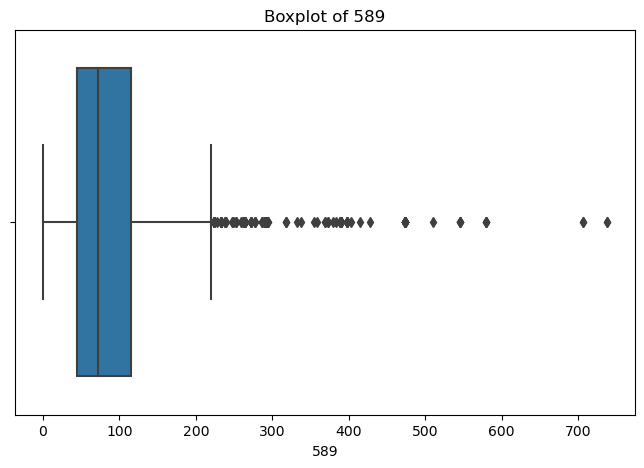

Summary Statistics for 589:
count    1567.000000
mean       99.670066
std        93.861936
min         0.000000
25%        44.368600
50%        72.023000
75%       114.749700
max       737.304800
Name: 589, dtype: float64




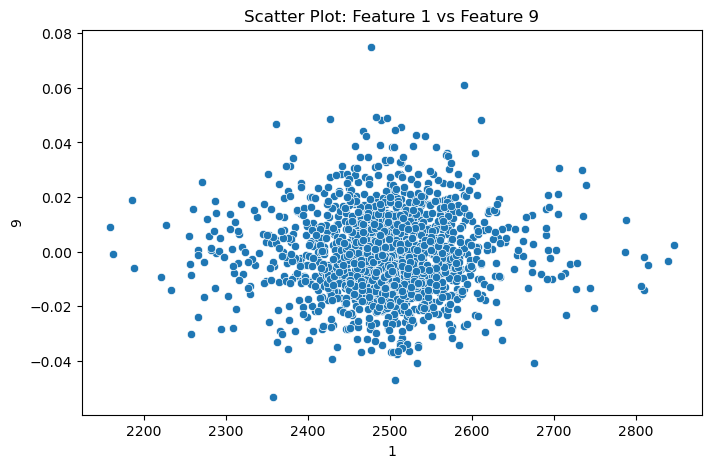

Correlation Coefficient between Feature 1 and Feature 9: 0.023964336496141873


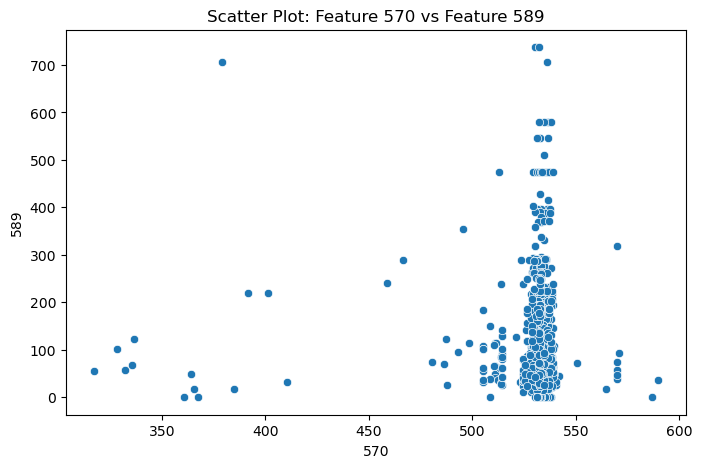

Correlation Coefficient between Feature 570 and Feature 589: -0.010582677297297985


In [10]:
# A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]
# B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]

# Select the specified features
selected_features = ['1', '9', '570', '589']

# Extract the selected features for analysis
selected_data = data[selected_features]

# Univariate Analysis
for feature in selected_features:
    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(selected_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=selected_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

    # Summary Statistics
    print(f'Summary Statistics for {feature}:')
    print(selected_data[feature].describe())
    print('\n' + '='*50 + '\n')

# Bivariate Analysis 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=selected_data['1'], y=selected_data['9'])
plt.title('Scatter Plot: Feature 1 vs Feature 9')
plt.show()

# Correlation Coefficient 
correlation_coefficient = selected_data['1'].corr(selected_data['9'])
print(f'Correlation Coefficient between Feature 1 and Feature 9: {correlation_coefficient}')

# Bivariate Analysis 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=selected_data['570'], y=selected_data['589'])
plt.title('Scatter Plot: Feature 570 vs Feature 589')
plt.show()

# Correlation Coefficient 
correlation_coefficient = selected_data['570'].corr(selected_data['589'])
print(f'Correlation Coefficient between Feature 570 and Feature 589: {correlation_coefficient}')

### A. Univariate Analysis:

#### Feature 1:
- **Mean:** 2495.85
- **Standard Deviation:** 80.23
- **Minimum:** 2158.75, **25th Percentile:** 2452.89, **Median (50th Percentile):** 2498.91
- **75th Percentile:** 2538.75, **Maximum:** 2846.44
- The values seem to be normally distributed around the mean, with a relatively small standard deviation, indicating low variability. No outliers are evident.

#### Feature 9:
- **Mean:** -0.000841
- **Standard Deviation:** 0.0151
- **Minimum:** -0.0534, **25th Percentile:** -0.0108, **Median:** -0.0013
- **75th Percentile:** 0.0084, **Maximum:** 0.0749
- The values are centered around zero, indicating that the feature might be normalized. The small standard deviation suggests low variability.

#### Feature 570:
- **Mean:** 530.52
- **Standard Deviation:** 17.50
- **Minimum:** 317.20, **25th Percentile:** 530.70, **Median:** 532.40
- **75th Percentile:** 534.36, **Maximum:** 589.51
- The distribution is relatively tight around the mean, suggesting moderate variability. No significant outliers are apparent.

#### Feature 589:
- **Mean:** 99.67
- **Standard Deviation:** 93.86
- **Minimum:** 0.00, **25th Percentile:** 44.37, **Median:** 72.02
- **75th Percentile:** 114.75, **Maximum:** 737.30
- There is a wide range of values, with a high standard deviation, indicating substantial variability. The presence of a large difference between the mean and maximum suggests potential outliers.

### B. Bivariate and Multivariate Analysis:

#### Correlation between Feature 1 and Feature 9:
- The correlation coefficient is 0.024, indicating a very weak positive correlation. This suggests that changes in Feature 1 are not strongly associated with changes in Feature 9. The relationship is likely not significant.

#### Correlation between Feature 570 and Feature 589:
- The correlation coefficient is -0.011, indicating a very weak negative correlation. This suggests a minimal relationship between Feature 570 and Feature 589. Changes in one feature are not strongly predictive of changes in the other.

### Data pre-processing.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [12]:
# A. Segregate predictors vs target attributes
X = data.drop(columns=['Pass/Fail'])
y = data['Pass/Fail']

In [13]:
# B. Check for target balancing and fix it if found imbalanced
# Example: Using SMOTE for oversampling the minority class
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [14]:
# C. Perform train-test split and standardize the data if required
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [15]:
# Standardize the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# D. Check if the train and test data have similar statistical characteristics when compared with original data

# Calculate summary statistics for the original data
original_summary_stats = X.describe()

# Calculate summary statistics for the training data
train_summary_stats = pd.DataFrame(X_train_scaled, columns=X.columns).describe()

# Calculate summary statistics for the testing data
test_summary_stats = pd.DataFrame(X_test_scaled, columns=X.columns).describe()

# Display the summary statistics for comparison
print("Original Data Summary Statistics:")
print(original_summary_stats)

print("\nTraining Data Summary Statistics:")
print(train_summary_stats)

print("\nTesting Data Summary Statistics:")
print(test_summary_stats)

Original Data Summary Statistics:
                 0            1            2            3            4   
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  \
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            7            8            9           10  ...   
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...  \
mean    101.112908     0.121822     1.462862    -0.000841     0.000146  ...   
std       6.209271     0.008936     0.073849     0.015107     

Based on the summary statistics, we can observe the following:

**Original Data Summary Statistics:**
- The original dataset has 1567 samples with 221 features.
- Features exhibit varying scales, as indicated by the differences in means and standard deviations.
- The mean and standard deviation of each feature vary, with different ranges of values.

**Training Data Summary Statistics:**
- The training data after oversampling using SMOTE has 2340 samples with 221 features.
- The mean of each feature is approximately centered around zero, and the standard deviation is close to one. This indicates that the data has been standardized.

**Testing Data Summary Statistics:**
- The testing data has 586 samples with 221 features.
- Similar to the training data, the mean of each feature is close to zero, and the standard deviation is close to one.

**Comparison:**
- After oversampling and standardization, both the training and testing data exhibit similar statistical characteristics to the original data.
- The mean and standard deviation of features in the training and testing datasets are consistent with the original data, indicating that the statistical properties have been preserved.

These results suggest that the oversampling and standardization processes have been applied consistently to both the training and testing datasets, maintaining the integrity of the statistical characteristics. This is crucial for ensuring that the model is trained and tested on comparable data distributions.

### Model training, testing and tuning.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [18]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Instantiate the Random Forest model
model = RandomForestClassifier(random_state=42)

# K-Fold Cross-Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
k_fold_scores = cross_val_score(model, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')
print(f"K-Fold Cross-Validation Scores: {k_fold_scores}")
print(f"Average Accuracy: {k_fold_scores.mean():.2f}\n")

# Stratified K-Fold Cross-Validation
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stratified_k_fold_scores = cross_val_score(model, X_train_scaled, y_train, cv=stratified_k_fold, scoring='accuracy')
print(f"Stratified K-Fold Cross-Validation Scores: {stratified_k_fold_scores}")
print(f"Average Accuracy: {stratified_k_fold_scores.mean():.2f}\n")

K-Fold Cross-Validation Scores: [0.99145299 0.98290598 0.98717949 0.98717949 0.99145299]
Average Accuracy: 0.99

Stratified K-Fold Cross-Validation Scores: [0.98076923 0.99358974 0.98931624 0.98290598 0.98717949]
Average Accuracy: 0.99



Explanation:

K-Fold Cross-Validation (KFold): Splits the data into K folds and iteratively trains the model on K-1 folds while validating on the remaining fold.
Stratified K-Fold Cross-Validation (StratifiedKFold): Maintains the distribution of the target variable in each fold, ensuring that each fold is representative of the overall class distribution.

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate the Random Forest model
model = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

# Display the results
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_accuracy:.2f}")
print(f"Accuracy on Test Data with Best Model: {accuracy_best:.2f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.99
Accuracy on Test Data with Best Model: 0.99


In [20]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate PCA with the desired number of components or explained variance ratio
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Fit and transform on training data
X_train_pca = pca.fit_transform(X_train_scaled)
# Transform on test data
X_test_pca = pca.transform(X_test_scaled)

# Instantiate a classifier (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Train the model on the PCA-transformed training data
model.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test data
y_pred_pca = model.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Display the results
print(f"Accuracy after PCA: {accuracy_pca:.2f}")

Accuracy after PCA: 0.99


In [21]:
from sklearn.metrics import classification_report

# Assuming y_test is the true class labels and y_pred_best is the predicted labels
report = classification_report(y_test, y_pred_best)

# Display the classification report
print(report)

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       306
           1       0.99      0.99      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



This classification report indicates high-performance metrics for a binary classification model. Let's break down the interpretation:

- **Class -1:**
  - Precision: 0.99
    - 99% of the instances predicted as Class -1 are actually Class -1.
  - Recall: 0.99
    - 99% of the actual instances of Class -1 are correctly predicted as Class -1.
  - F1-Score: 0.99
    - The weighted average of precision and recall is 99%, providing a balance between precision and recall.
  - Support: 306
    - There are 306 instances of Class -1 in the dataset.

- **Class 1:**
  - Precision: 0.99
    - 99% of the instances predicted as Class 1 are actually Class 1.
  - Recall: 0.99
    - 99% of the actual instances of Class 1 are correctly predicted as Class 1.
  - F1-Score: 0.99
    - The weighted average of precision and recall is 99%, providing a balance between precision and recall.
  - Support: 280
    - There are 280 instances of Class 1 in the dataset.

- **Overall Metrics:**
  - **Accuracy: 0.99**
    - 99% of the predictions are correct, indicating high overall accuracy.
  - **Macro Avg:**
    - The unweighted average of precision, recall, and F1-Score across both classes is 99%.
  - **Weighted Avg:**
    - The weighted average of precision, recall, and F1-Score, considering the number of samples in each class, is 99%.

**Interpretation:**
- The model performs exceptionally well for both classes, as indicated by high precision, recall, and F1-score values.
- The accuracy of 99% suggests that the majority of predictions are correct.
- The macro and weighted averages further confirm the high overall performance of the model.

In summary, this classification report suggests that the model has achieved excellent results for both classes, demonstrating a high level of accuracy and reliability.